# Graph metrics

In this notebook we will look at metrics: 

- degree
- betweenness
- pagerank
- hits

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp

In [2]:



df = pd.read_csv('graph_simple.csv', index_col = 0)
print(df)

         Natalie  Jill  Kasia  Boo  Dill  Xi  Rash
Natalie        0     1      0    4     1   0     1
Jill           1     0      0    1     0   5     0
Kasia          1     0      3    0     1   1     0
Boo            4     1      0    0     0   0     1
Dill           0     0      0    0     0   0     3
Xi             0     5      0    0     0   0     0
Rash           1     0      0    1     3   0     0


In [3]:
DG = nx.DiGraph()
for row, row_values in df.iterrows():
    print('\nNode: ', row)
    for column, value in enumerate(row_values):
        if value > 0:
            print('Connected to ', df.columns[column], ' with weight: ', value)
            DG.add_edge(row, df.columns[column], weight=value)


Node:  Natalie
Connected to  Jill  with weight:  1
Connected to  Boo  with weight:  4
Connected to  Dill  with weight:  1
Connected to  Rash  with weight:  1

Node:  Jill
Connected to  Natalie  with weight:  1
Connected to  Boo  with weight:  1
Connected to  Xi  with weight:  5

Node:  Kasia
Connected to  Natalie  with weight:  1
Connected to  Kasia  with weight:  3
Connected to  Dill  with weight:  1
Connected to  Xi  with weight:  1

Node:  Boo
Connected to  Natalie  with weight:  4
Connected to  Jill  with weight:  1
Connected to  Rash  with weight:  1

Node:  Dill
Connected to  Rash  with weight:  3

Node:  Xi
Connected to  Jill  with weight:  5

Node:  Rash
Connected to  Natalie  with weight:  1
Connected to  Boo  with weight:  1
Connected to  Dill  with weight:  3


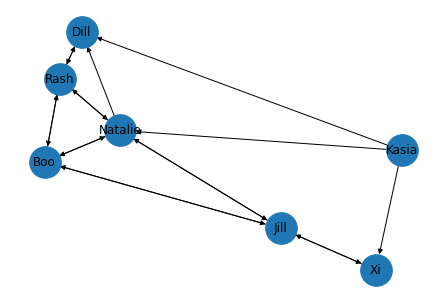

In [4]:
pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 1000)
plt.show()

### Metrics

In [5]:
degree = nx.degree_centrality(DG)
betweenness = nx.betweenness_centrality(DG)
pagerank = nx.pagerank_numpy(DG)
hits = nx.hits_numpy(DG)

{'Boo': 1.0,
 'Dill': 0.6666666666666666,
 'Jill': 1.0,
 'Kasia': 0.8333333333333333,
 'Natalie': 1.3333333333333333,
 'Rash': 1.0,
 'Xi': 0.5}


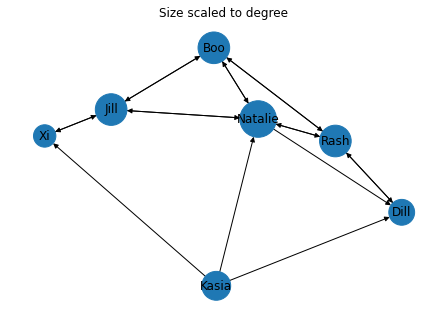

In [6]:
pp.pprint(degree)

pos = nx.spring_layout(DG)

size = [value * 1000 for value in degree.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

{'Boo': 0.1,
 'Dill': 0.016666666666666666,
 'Jill': 0.26666666666666666,
 'Kasia': 0.0,
 'Natalie': 0.25,
 'Rash': 0.15,
 'Xi': 0.016666666666666666}


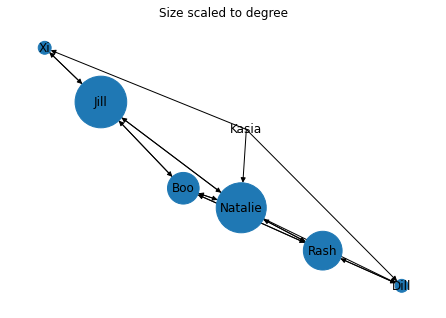

In [7]:
pp.pprint(betweenness)

pos = nx.spring_layout(DG)

size = [(value) * 10000  for value in betweenness.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

{'Boo': 0.15599228081838895,
 'Dill': 0.14072269641461532,
 'Jill': 0.1790240456860984,
 'Kasia': 0.03726708074534163,
 'Natalie': 0.16804537192764038,
 'Rash': 0.1835472792786227,
 'Xi': 0.13540124512929258}


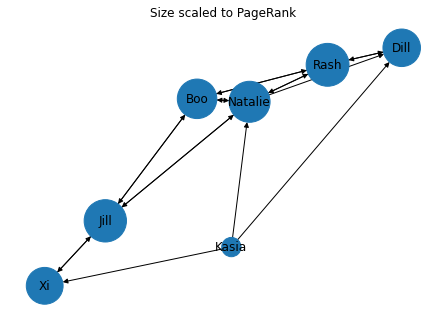

In [8]:
pp.pprint(pagerank)

pos = nx.spring_layout(DG)

size = [value * 10000 for value in pagerank.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to PageRank")
plt.show()

{'Boo': 0.1678962767785595,
 'Dill': 0.037702964222784865,
 'Jill': 0.24232378729170825,
 'Kasia': 0.11269749710461745,
 'Natalie': 0.17642853382608598,
 'Rash': 0.11190078699407188,
 'Xi': 0.15105015378217218}


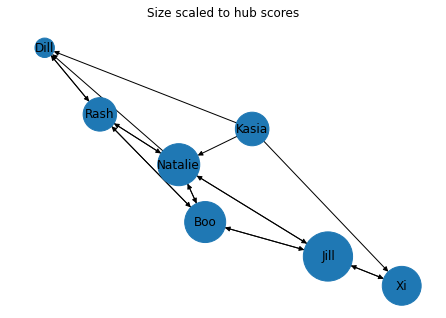

In [9]:
pp.pprint(hits[0])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[0].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to hub scores")
plt.show()

{'Natalie': 0.1884105770444442, 'Jill': 0.18196782009982984, 'Boo': 0.1754083484725308, 'Dill': 0.1034023149759049, 'Rash': 0.07570031144330829, 'Xi': 0.21915999138872266, 'Kasia': 0.05595063657525925}


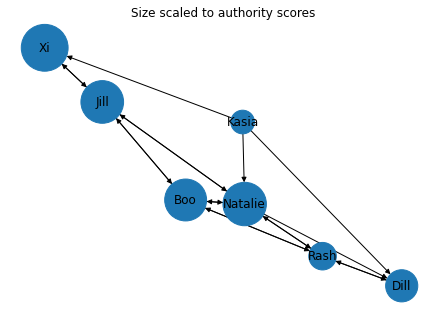

In [10]:
print(hits[1])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[1].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to authority scores")
plt.show()